In [22]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re
import nltk
from nltk.corpus import stopwords
import nltk as nlp
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import explained_variance_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from keras.layers import LSTM
from tensorflow.keras.layers import Embedding,  Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings("ignore")
import nltk
from nltk.stem import WordNetLemmatizer
# Ensure NLTK resources are downloaded
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
import joblib


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [23]:
#getting the data and show the first 5 rows
nlp_data = pd.read_csv("fake_job_postings.csv")
nlp_data.head(3)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0


In [24]:
#show some the information about the data
nlp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [25]:
# identifying which columns contain missing data and how much missing data there is
nlp_data.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [26]:
nlp_data.title.value_counts()

title
English Teacher Abroad                                         311
Customer Service Associate                                     146
Graduates: English Teacher Abroad (Conversational)             144
English Teacher Abroad                                          95
Software Engineer                                               86
                                                              ... 
West Coast Regional Channel Manager (RCM)                        1
BI Practice Manager                                              1
Community Coordinator- Ambassador Programme                      1
Senior Traffic Engineer                                          1
Project Cost Control Staff Engineer - Cost Control Exp - TX      1
Name: count, Length: 11231, dtype: int64

In [27]:
nlp_data.location.value_counts()

location
GB, LND, London          718
US, NY, New York         658
US, CA, San Francisco    472
GR, I, Athens            464
US, ,                    339
                        ... 
GB, SFK, Leiston           1
GB, LND, Hammersmith       1
US, WA, Seattle            1
BE                         1
GB, WSX, Chichester        1
Name: count, Length: 3105, dtype: int64

In [28]:
nlp_data.department.value_counts()

department
Sales                                          551
Engineering                                    487
Marketing                                      401
Operations                                     270
IT                                             225
                                              ... 
Commercial Management / Contract Management      1
Exec                                             1
Marcomm                                          1
CRM                                              1
Hospitality                                      1
Name: count, Length: 1337, dtype: int64

In [29]:
nlp_data.salary_range.value_counts()

salary_range
0-0            142
40000-50000     66
30000-40000     55
25000-30000     37
45000-67000     37
              ... 
15-25            1
60-75            1
27500-36000      1
20-22            1
3700-3800        1
Name: count, Length: 874, dtype: int64

In [30]:
nlp_data.function.value_counts()

function
Information Technology    1749
Sales                     1468
Engineering               1348
Customer Service          1229
Marketing                  830
Administrative             630
Design                     340
Health Care Provider       338
Other                      325
Education                  325
Management                 317
Business Development       228
Accounting/Auditing        212
Human Resources            205
Project Management         183
Finance                    172
Consulting                 144
Writing/Editing            132
Art/Creative               132
Production                 116
Product Management         114
Quality Assurance          111
Advertising                 90
Business Analyst            84
Data Analyst                82
Public Relations            76
Manufacturing               74
General Business            68
Research                    50
Legal                       47
Strategy/Planning           46
Training                    38

In [31]:
type(nlp_data.title)

pandas.core.series.Series

In [32]:
title_series = pd.Series(nlp_data.title)
title_series.value_counts()

title
English Teacher Abroad                                         311
Customer Service Associate                                     146
Graduates: English Teacher Abroad (Conversational)             144
English Teacher Abroad                                          95
Software Engineer                                               86
                                                              ... 
West Coast Regional Channel Manager (RCM)                        1
BI Practice Manager                                              1
Community Coordinator- Ambassador Programme                      1
Senior Traffic Engineer                                          1
Project Cost Control Staff Engineer - Cost Control Exp - TX      1
Name: count, Length: 11231, dtype: int64

In [33]:
nlp_data = pd.DataFrame(nlp_data)

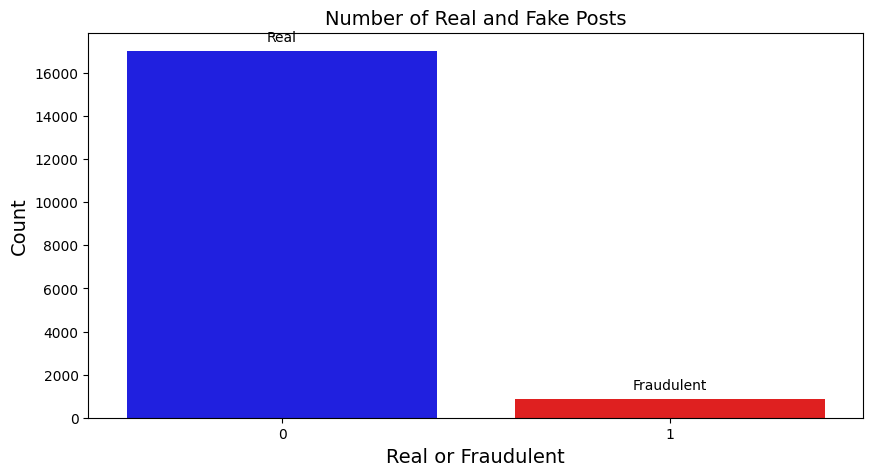

In [34]:
#Visualization Fraudelent vs Real
labels = ['Real', 'Fraudulent']
plt.figure(figsize=(10, 5))
ax = sb.countplot(x="fraudulent", palette=["blue", "red"], data=nlp_data)

# Add labels to the bars
for p, label in zip(ax.patches, labels * len(ax.patches)):
    ax.annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title("Number of Real and Fake Posts", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xlabel('Real or Fraudulent', fontsize=14)
plt.show()

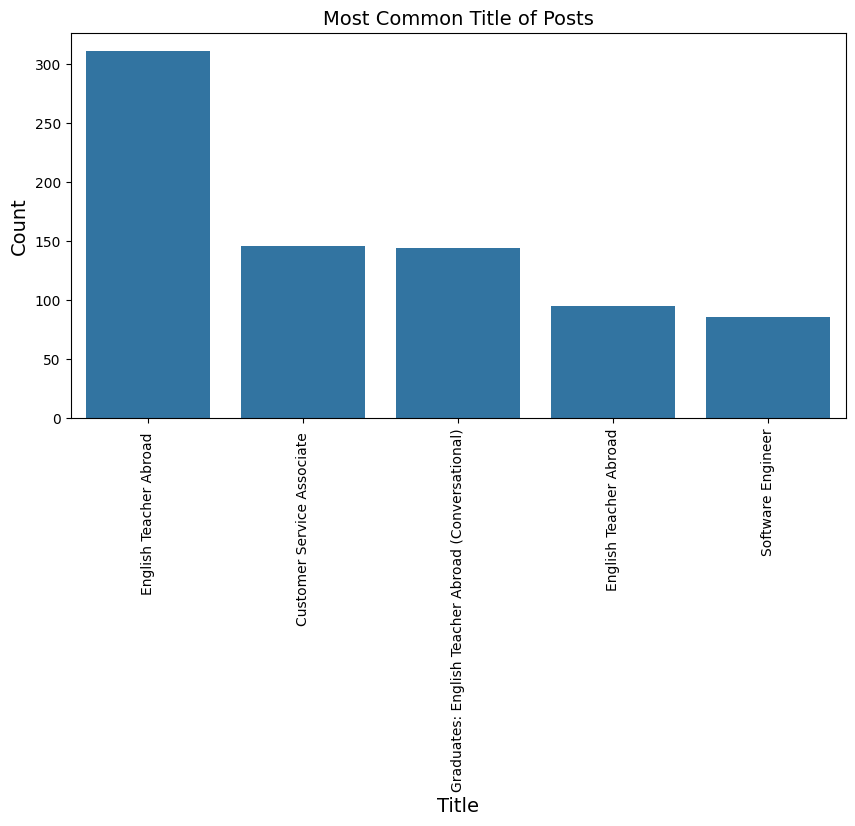

In [35]:
#Visualization Title Feature
title = nlp_data.title.value_counts()[:5]
plt.figure(figsize = (10,5))
sb.barplot(x = title.index, y = title )
plt.title("Most Common Title of Posts", fontdict = {"fontsize" : 14})
plt.xlabel("Title", fontdict = {"fontsize" : 14})
plt.ylabel("Count", fontdict = {"fontsize" : 14})
plt.xticks(rotation=90);

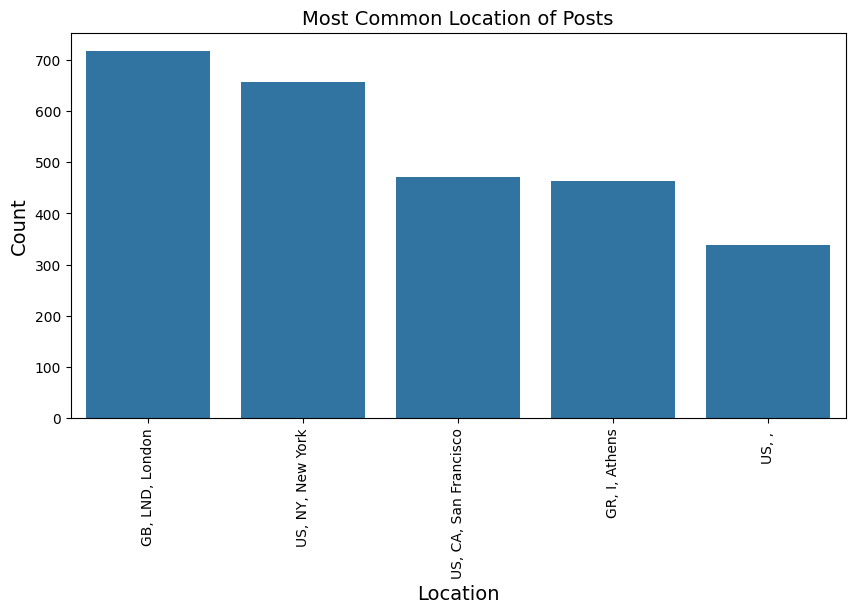

In [36]:
# Visualization Location Feature
location = nlp_data.location.value_counts()[:5]
plt.figure(figsize = (10,5))
sb.barplot(x = location.index, y = location, )
plt.title("Most Common Location of Posts", fontdict = {"fontsize" : 14})
plt.xlabel("Location", fontdict = {"fontsize" : 14})
plt.ylabel("Count", fontdict = {"fontsize" : 14})
plt.xticks(rotation=90);

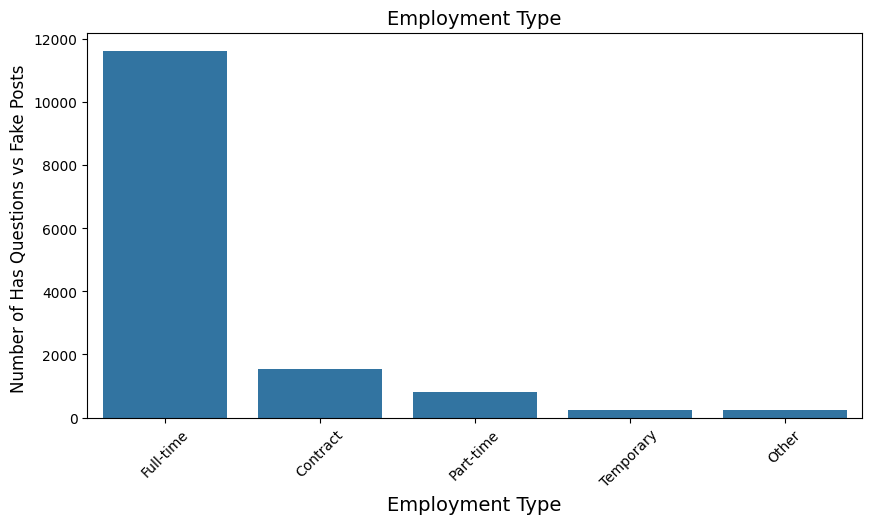

In [37]:
# Visualization Employment Type
employment_type = nlp_data.employment_type.value_counts()
plt.figure(figsize = (10,5))
sb.barplot(x = employment_type.index, y = employment_type)
plt.title("Employment Type", fontdict = {"fontsize" : 14})
plt.xlabel("Employment Type", fontdict = {"fontsize" : 14})
plt.ylabel("Number of Has Questions vs Fake Posts ", fontdict = {"fontsize" : 12})
plt.xticks(rotation = 45);

In [38]:
nlp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [39]:
nlp_data.fillna(" ", inplace = True)       

In [41]:
def extract_feature(data):
    #Combine all text in a feaure
    new_nlp_data = data
    new_nlp_data['str_information'] = data['title'] + " " + data['department'] + \
             " " + data['company_profile'] + " " + \
             data['description'] + " " + \
             data['requirements'] + " " +\
             data['benefits'] + " " +\
             data['function'] + " " +\
             data['required_experience']+ " "+\
             data["required_education"]+ " " +\
             data["industry"]
             
    
    # drop unnecessary
    new_nlp_data.drop(columns=['title', 'department', 'company_profile', 'description', 'requirements', 'benefits', 'function', 'required_experience', 'required_education', 'industry'], inplace=True)
        
    # initialize the WordNetLemmatizer
    lemma = WordNetLemmatizer()

    # contractions mapping dictionary
    contractions = {
                "ain't": "am not",
                "aren't": "are not",
                "can't": "cannot",
                "can't've": "cannot have",
                "'cause": "because",
                "could've": "could have",
                "couldn't": "could not",
                "couldn't've": "could not have",
                "didn't": "did not",
                "doesn't": "does not",
                "don't": "do not",
                "hadn't": "had not",
                "hadn't've": "had not have",
                "hasn't": "has not",
                "haven't": "have not",
                "he'd": "he had / he would",
                "he'd've": "he would have",
                "he'll": "he shall / he will",
                "he'll've": "he shall have / he will have",
                "he's": "he has / he is",
                "how'd": "how did",
                "how'd'y": "how do you",
                "how'll": "how will",
                "how's": "how has / how is / how does",
                "I'd": "I had / I would",
                "I'd've": "I would have",
                "I'll": "I shall / I will",
                "I'll've": "I shall have / I will have",
                "I'm": "I am",
                "I've": "I have",
                "isn't": "is not",
                "it'd": "it had / it would",
                "it'd've": "it would have",
                "it'll": "it shall / it will",
                "it'll've": "it shall have / it will have",
                "it's": "it has / it is",
                "let's": "let us",
                "ma'am": "madam",
                "mayn't": "may not",
                "might've": "might have",
                "mightn't": "might not",
                "mightn't've": "might not have",
                "must've": "must have",
                "mustn't": "must not",
                "mustn't've": "must not have",
                "needn't": "need not",
                "needn't've": "need not have",
                "o'clock": "of the clock",
                "oughtn't": "ought not",
                "oughtn't've": "ought not have",
                "shan't": "shall not",
                "sha'n't": "shall not",
                "shan't've": "shall not have",
                "she'd": "she had / she would",
                "she'd've": "she would have",
                "she'll": "she shall / she will",
                "she'll've": "she shall have / she will have",
                "she's": "she has / she is",
                "should've": "should have",
                "shouldn't": "should not",
                "shouldn't've": "should not have",
                "so've": "so have",
                "so's": "so as / so is",
                "that'd": "that would / that had",
                "that'd've": "that would have",
                "that's": "that has / that is",
                "there'd": "there had / there would",
                "there'd've": "there would have",
                "there's": "there has / there is",
                "they'd": "they had / they would",
                "they'd've": "they would have",
                "they'll": "they shall / they will",
                "they'll've": "they shall have / they will have",
                "they're": "they are",
                "they've": "they have",
                "to've": "to have",
                "wasn't": "was not",
                "we'd": "we had / we would",
                "we'd've": "we would have",
                "we'll": "we will",
                "we'll've": "we will have",
                "we're": "we are",
                "we've": "we have",
                "weren't": "were not",
                "what'll": "what shall / what will",
                "what'll've": "what shall have / what will have",
                "what're": "what are",
                "what's": "what has / what is",
                "what've": "what have",
                "when's": "when has / when is",
                "when've": "when have",
                "where'd": "where did",
                "where's": "where has / where is",
                "where've": "where have",
                "who'll": "who shall / who will",
                "who'll've": "who shall have / who will have",
                "who's": "who has / who is",
                "who've": "who have",
                "why's": "why has / why is",
                "why've": "why have",
                "will've": "will have",
                "won't": "will not",
                "won't've": "will not have",
                "would've": "would have",
                "wouldn't": "would not",
                "wouldn't've": "would not have",
                "y'all": "you all",
                "y'all'd": "you all would",
                "y'all'd've": "you all would have",
                "y'all're": "you all are",
                "y'all've": "you all have",
                "you'd": "you had / you would",
                "you'd've": "you would have",
                "you'll": "you shall / you will",
                "you'll've": "you shall have / you will have",
                "you're": "you are",
                "you've": "you have"
    }
    
    # function to handle contractions
    def expand_contractions(text, contractions_dict):
        for contraction, expansion in contractions_dict.items():
            text = text.replace(contraction, expansion)
        return text
    
    
    
    # list to store preprocessed text
    text_list = []

    # iterate over each text in the 'str_information' column
    for text in new_nlp_data['str_information']:
        # convert text to lowercase
        text = text.lower()
    
        # remove special characters except letters
        text = re.sub(r'[^a-zA-Z\s]', '', text)
    
        # expand contractions
        text = expand_contractions(text, contractions)
    
        # tokenize the text
        tokens = nltk.word_tokenize(text)
    
        # remove stopwords
        tokens = [word for word in tokens if word not in set(stopwords.words("english"))]
    
        # lemmatize the words
        tokens = [lemma.lemmatize(word) for word in tokens]
    
        #join the lemmatized tokens back into a string
        processed_text = " ".join(tokens)
    
        # append the processed text to the list
        text_list.append(processed_text)


    new_nlp_data['str_information'] = text_list
    new_nlp_data.duplicated(subset=['str_information']).sum()
    
    # removing all duplicated data  
    new_nlp_data['str_information'] = new_nlp_data['str_information'].drop_duplicates()
    new_nlp_data.fraudulent.value_counts(dropna = False)
    
    # word count in each row
    editing_data = new_nlp_data
    editing_data['word count'] = [len(str(i).split(' ')) for i in editing_data['str_information']]
    
    # max word length
    max_length = editing_data['word count'].max()
    
    max_features = 10000
    # create the tokenizer
    token = Tokenizer(num_words = max_features)
    # fit the tokenizer on the documents
    token.fit_on_texts(text_list)
    encoded_docs = token.texts_to_sequences(text_list)
    joblib.dump(token, './tokinezer_file')

    embedded_docs=pad_sequences(encoded_docs,padding='pre',maxlen=max_length)
    pd.DataFrame(embedded_docs)
    
    return editing_data,embedded_docs


In [42]:
editing_data,embedded_docs = extract_feature(nlp_data)
editing_data
embedded_docs

array([[   0,    0,    0, ...,  129,   20,  619],
       [   0,    0,    0, ...,  536,   20,  251],
       [   0,    0,    0, ..., 1970,   19, 1509],
       ...,
       [   0,    0,    0, ...,  456,  633, 2282],
       [   0,    0,    0, ...,   49,  809,   23],
       [   0,    0,    0, ...,   21,  108,   32]])

In [43]:
# define the y 
y = editing_data['fraudulent'].values
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [44]:
# reshape the y 
y = y.reshape(-1,1)
y.shape

(17880, 1)

In [45]:
#reshape the x
x = np.array(embedded_docs)
x.shape

(17880, 1386)

In [46]:
#splite and train the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.15, random_state= 101)
print("X_train shape: ",x_train.shape)
print("X_test shape : ",x_test.shape )
print("y_train shape: ",y_train.shape)
print("y_test shape : ",y_test.shape)

X_train shape:  (15198, 1386)
X_test shape :  (2682, 1386)
y_train shape:  (15198, 1)
y_test shape :  (2682, 1)


Epoch 1/100
475/475 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9558 - loss: 0.1817 - val_accuracy: 0.9814 - val_loss: 0.0651
Epoch 2/100
475/475 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9896 - loss: 0.0346 - val_accuracy: 0.9847 - val_loss: 0.0517
Epoch 3/100
475/475 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9985 - loss: 0.0097 - val_accuracy: 0.9855 - val_loss: 0.0553
Epoch 4/100
475/475 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9998 - loss: 0.0032 - val_accuracy: 0.9828 - val_loss: 0.0658
Epoch 5/100
475/475 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9997 - loss: 0.0024 - val_accuracy: 0.9858 - val_loss: 0.0627
Epoch 6/100
475/475 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.9858 - val_loss: 0.0650
Epoch 7/100
475/475 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 1.0000 - loss: 6.7553e-04 - val_accuracy: 0.9836 - val_loss: 0.0834
Epoch 8/100
475/475 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 1.0000 - loss: 4.6301e-04 - 

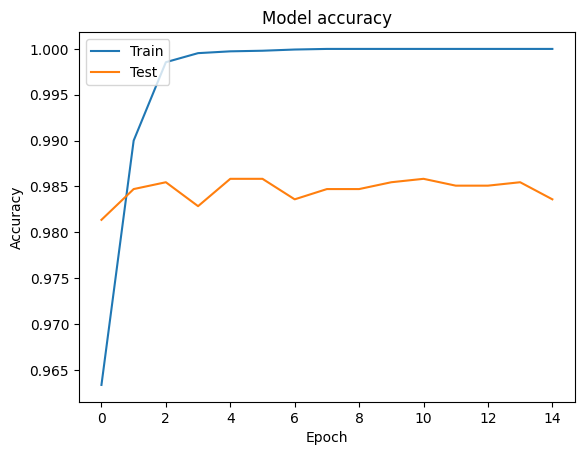

In [49]:
import keras
from keras.layers import Flatten

max_features = 10000
max_length = editing_data['word count'].max()
nn_model = keras.Sequential()
embedding_vector_features = 40
nn_model.add(Embedding(max_features, embedding_vector_features, input_length=max_length))
nn_model.add(Flatten())  # Add a Flatten layer here
nn_model.add(Dense(1, activation='sigmoid'))

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#define the early stop
early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=10,
    monitor='val_accuracy',
    restore_best_weights=True
)

history = nn_model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=100,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]
)


# show loss function and accuracy of the model
y_predict = nn_model.predict(x_test)
model_loss,model_accuracy=nn_model.evaluate(x_test,y_test)
print("Model loss is : ",model_loss)
print("Model Accuracy is : ",model_accuracy)
print("\n\n\n")


# plot the function  
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [52]:
from sklearn.tree import DecisionTreeClassifier

# decision tree classifier model
decision_tree_classifier = DecisionTreeClassifier(random_state=101)
decision_tree_classifier.fit(x_train, y_train)

# predict on the testing set
y_pred = decision_tree_classifier.predict(x_test)

# calculate accuracy
model_accuracy = accuracy_score(y_test, y_pred)

print("Model Accuracy is:", model_accuracy)

Model Accuracy is: 0.9429530201342282


In [53]:
from sklearn.naive_bayes import GaussianNB
# the Naive Bayes classifier
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(x_train, y_train)

# predict on the testing set
y_pred = naive_bayes_classifier.predict(x_test)

# calculate accuracy
model_accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes Accuracy:", model_accuracy)

Naive Bayes Accuracy: 0.07009694258016405


In [54]:
from sklearn.linear_model import LogisticRegression

# initialize and train the Logistic Regression classifier
logistic_regression_classifier = LogisticRegression(random_state=101)
logistic_regression_classifier.fit(x_train, y_train)

# predict on the testing set
y_pred = logistic_regression_classifier.predict(x_test)

# calculate accuracy
model_accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", model_accuracy)

Logistic Regression Accuracy: 0.9500372856077554


In [55]:
from sklearn.neighbors import KNeighborsClassifier

# the KNN classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(x_train, y_train)

# predict on the testing set
y_pred = knn_classifier.predict(x_test)

# calculate accuracy
model_accuracy = accuracy_score(y_test, y_pred)
print("KNN Accuracy:", model_accuracy)




KNN Accuracy: 0.9571215510812826


In [56]:
# create and train the Random Forest Classifier
random_forest_classifier = RandomForestClassifier(random_state=101)
random_forest_classifier.fit(x_train, y_train)

# predict on the testing set
y_pred = random_forest_classifier.predict(x_test)

# calculate accuracy
model_accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Classifier Accuracy:", model_accuracy)

Random Forest Classifier Accuracy: 0.9679343773303505


In [57]:
def predict_sample(sample):
    # predict with the neural network model
    nn_prediction = nn_model.predict(sample)
    nn_class = "Positive" if nn_prediction >= 0.5 else "Negative"
    print("Neural Network Prediction:", nn_class)
    
    # predict with Decision Tree Classifier
    dt_prediction = decision_tree_classifier.predict(sample)
    dt_class = "Positive" if dt_prediction == 1 else "Negative"
    print("Decision Tree Prediction:", dt_class)
    
    # predict with Naive Bayes Classifier
    nb_prediction = naive_bayes_classifier.predict(sample)
    nb_class = "Positive" if nb_prediction == 1 else "Negative"
    print("Naive Bayes Prediction:", nb_class)
    
    # predict with Logistic Regression Classifier
    lr_prediction = logistic_regression_classifier.predict(sample)
    lr_class = "Positive" if lr_prediction == 1 else "Negative"
    print("Logistic Regression Prediction:", lr_class)
    
    # predict with KNN Classifier
    knn_prediction = knn_classifier.predict(sample)
    knn_class = "Positive" if knn_prediction == 1 else "Negative"
    print("KNN Prediction:", knn_class)
    
    # predict with rf Classifier
    svm_prediction = random_forest_classifier.predict(sample)
    svm_class = "Positive" if svm_prediction == 1 else "Negative"
    print("SVM Prediction:", svm_class)


In [63]:
sample = embedded_docs[0]
predict_sample(sample.reshape(1, -1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Neural Network Prediction: Negative
Decision Tree Prediction: Negative
Naive Bayes Prediction: Positive
Logistic Regression Prediction: Negative
KNN Prediction: Negative
SVM Prediction: Negative


In [66]:
from sklearn.metrics import classification_report

# set the threshold for predictions
threshold = 0.5

# convert continuous predictions to binary labels
nn_predictions_binary = (nn_model.predict(x_test) >= threshold).astype(int)
dt_predictions_binary = decision_tree_classifier.predict(x_test)
nb_predictions_binary = naive_bayes_classifier.predict(x_test)
lr_predictions_binary = logistic_regression_classifier.predict(x_test)
knn_predictions_binary = knn_classifier.predict(x_test)
svm_predictions_binary = random_forest_classifier.predict(x_test)

# neural Network classification report
nn_report = classification_report(y_test, nn_predictions_binary)
print("Neural Network Classification Report:\n", nn_report)

# decision Tree Classifier classification report
dt_report = classification_report(y_test, dt_predictions_binary)
print("Decision Tree Classifier Classification Report:\n", dt_report)

# naive Bayes Classifier classification report
nb_report = classification_report(y_test, nb_predictions_binary)
print("Naive Bayes Classifier Classification Report:\n", nb_report)

# logistic Regression Classifier classification report
lr_report = classification_report(y_test, lr_predictions_binary)
print("Logistic Regression Classifier Classification Report:\n", lr_report)

# kNN Classifier classification report
knn_report = classification_report(y_test, knn_predictions_binary)
print("KNN Classifier Classification Report:\n", knn_report)

# random Forest Classifier classification report
svm_report = classification_report(y_test, svm_predictions_binary)
print("Random Forest Classifier Classification Report:\n", svm_report)


84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Neural Network Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2559
           1       0.95      0.73      0.83       123

    accuracy                           0.99      2682
   macro avg       0.97      0.86      0.91      2682
weighted avg       0.99      0.99      0.98      2682

Decision Tree Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      2559
           1       0.40      0.46      0.43       123

    accuracy                           0.94      2682
   macro avg       0.68      0.71      0.70      2682
weighted avg       0.95      0.94      0.95      2682

Naive Bayes Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.03      0.05      2559
           1       0.05      0.98      0.09       123

    accu